In [71]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.analyse_results as analyse_results

cpal = sns.color_palette()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

%matplotlib inline

In [64]:
year = 2014
month = 4
day = 26

In [65]:
CI = xr.open_dataset(
    f'/a2/uaren/travis/data/{year:04}/{month:02}/{day:02}/data.nc')
CI = CI['ci']
CI = letkf_io.add_crop_attributes(CI)
CI_ed = analyse_results.return_error_domain(CI)

In [66]:
CI

<xarray.DataArray 'ci' (time: 22, south_north: 1445, west_east: 1445)>
[45936550 values with dtype=float64]
Coordinates:
  * west_east    (west_east) float64 80.0 80.25 80.5 80.75 81.0 81.25 81.5 ...
  * south_north  (south_north) float64 -118.0 -117.8 -117.5 -117.2 -117.0 ...
  * time         (time) datetime64[ns] 2014-04-26T16:30:00 ...
Attributes:
    we_er_min:  240
    we_er_max:  280
    sn_er_min:  32
    sn_er_max:  88

In [67]:
def return_edges(x):
    dx = x[1] - x[0]
    x = x - dx/2
    x = np.append(x, [x[-1] + dx])
    return x

In [68]:
start = pd.datetime(year, month, day, 16, 30)
end = pd.datetime(year, month, day, 22, 30)

In [69]:
%matplotlib inline

/home/travis/miniconda3/envs/letkf/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


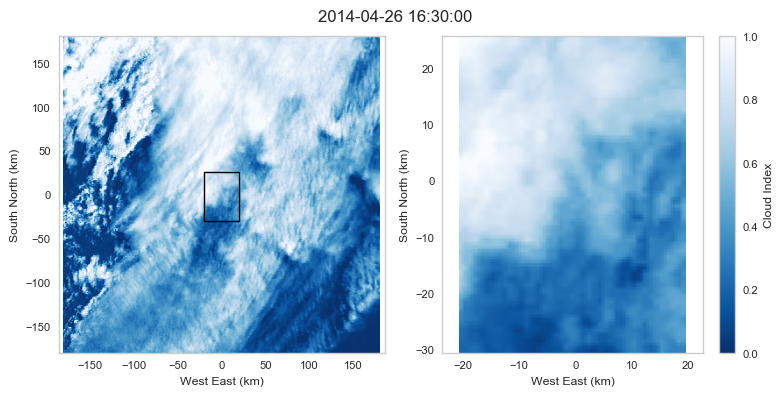

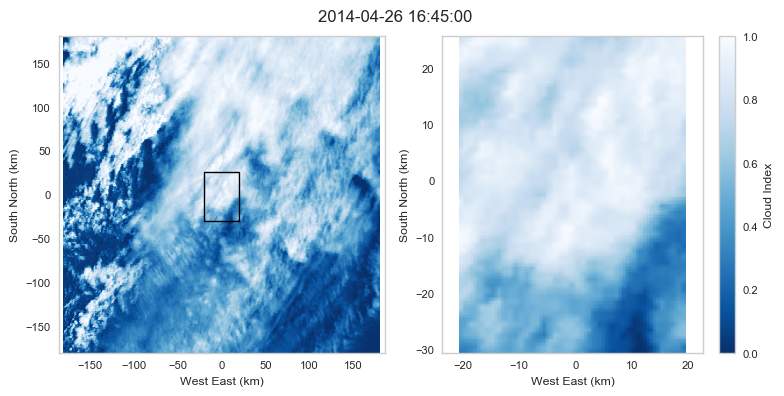

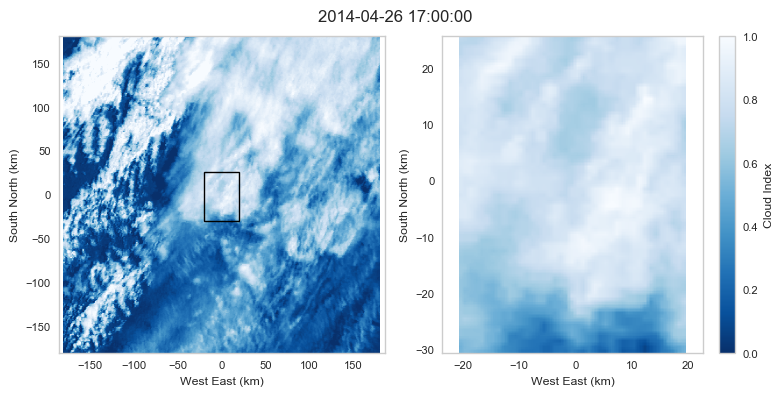

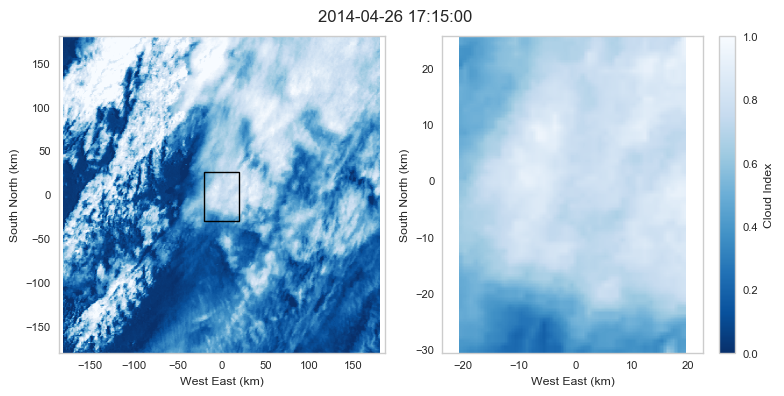

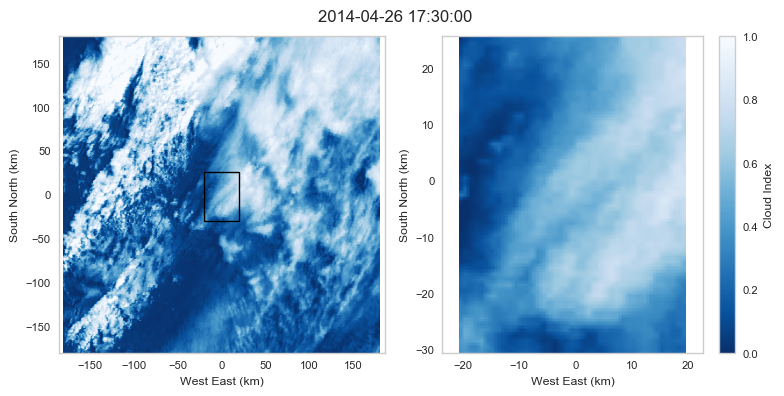

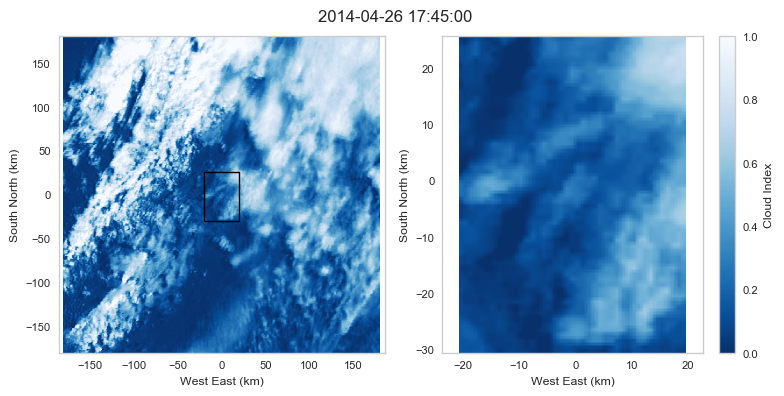

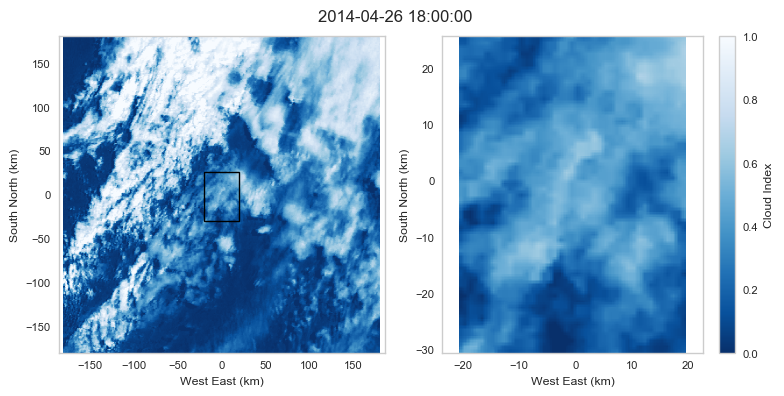

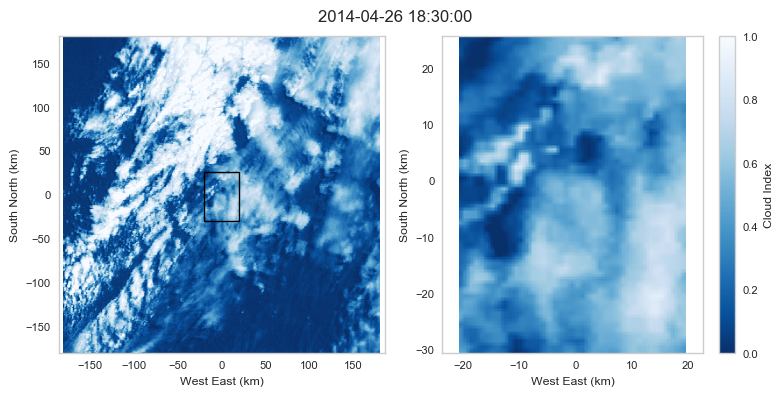

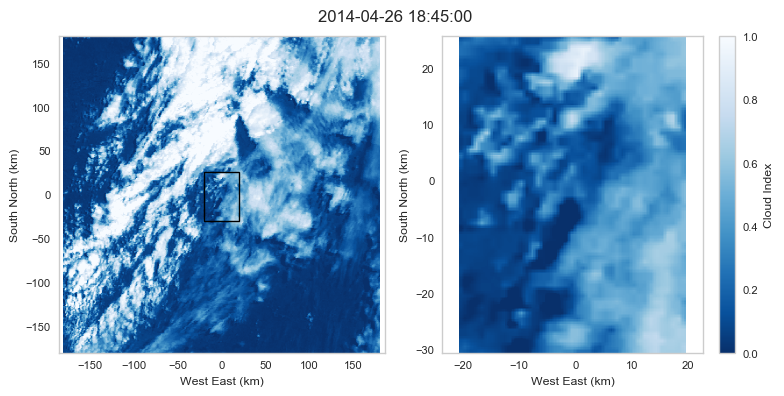

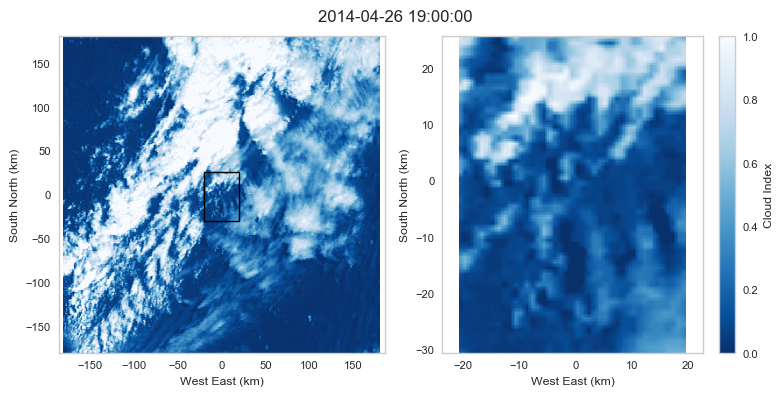

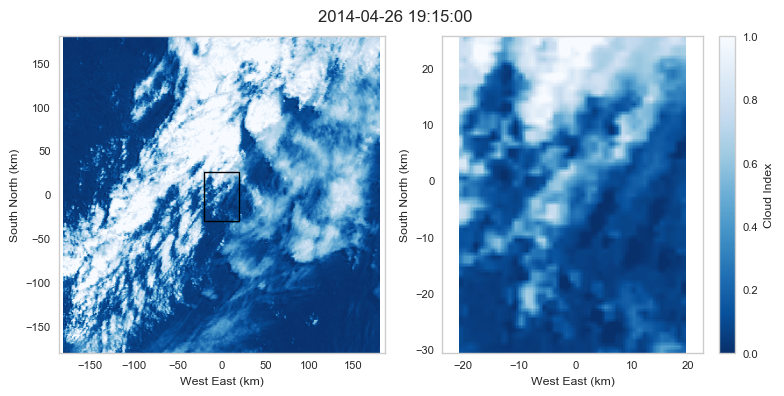

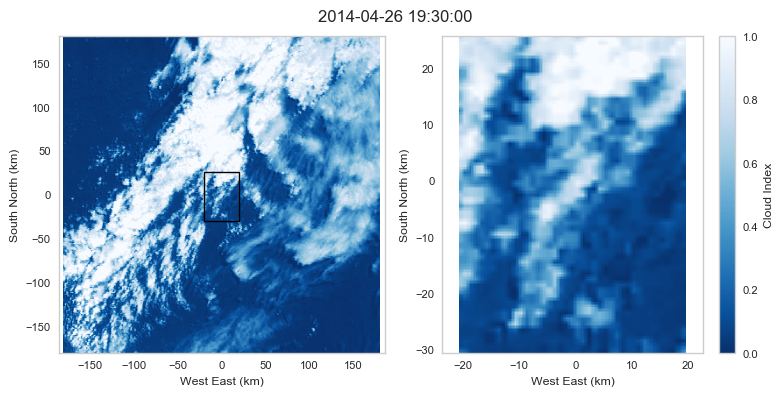

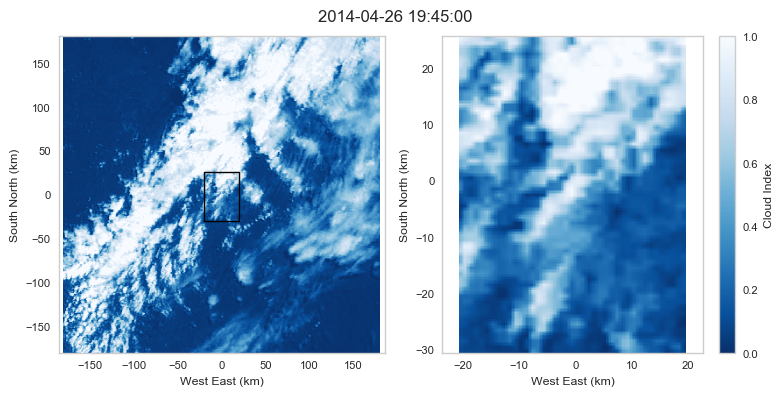

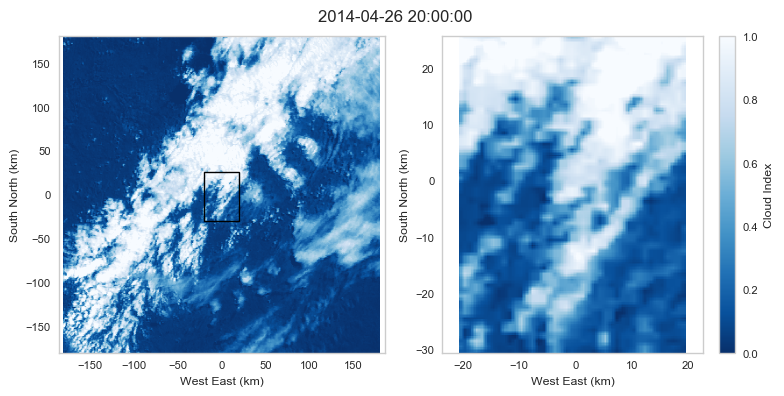

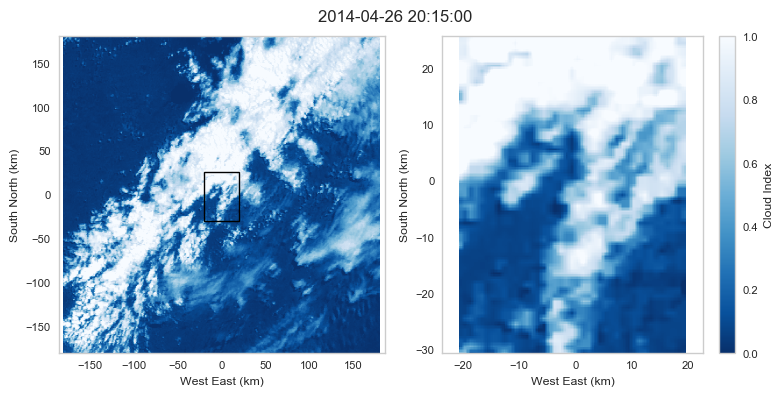

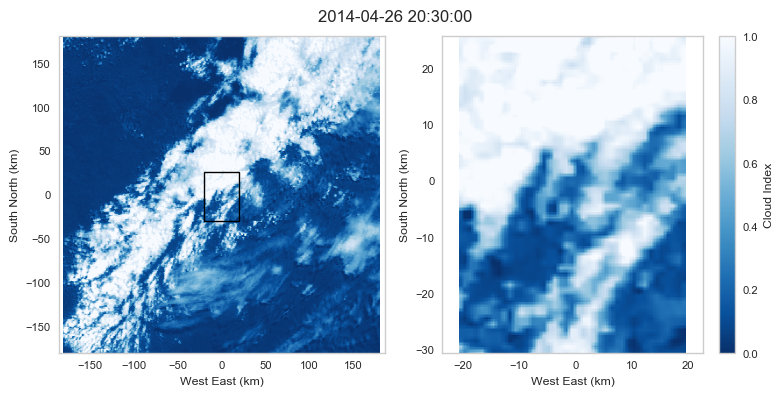

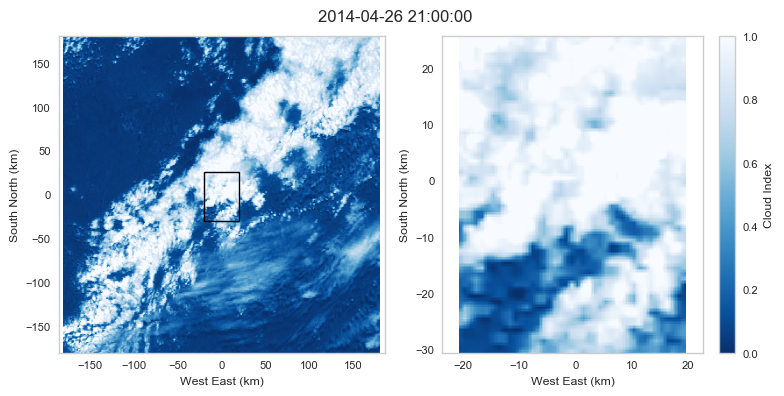

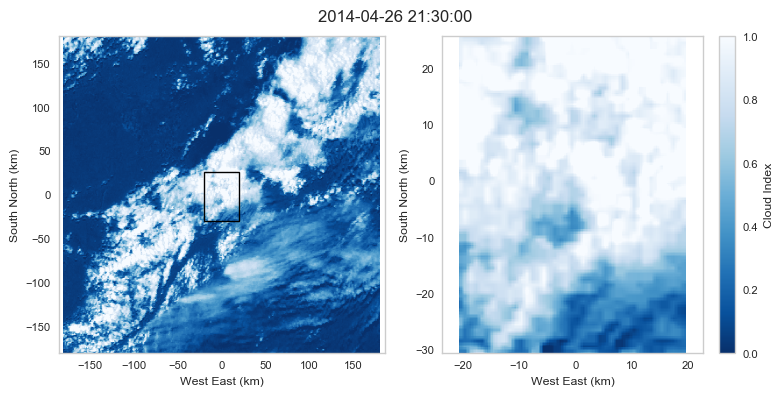

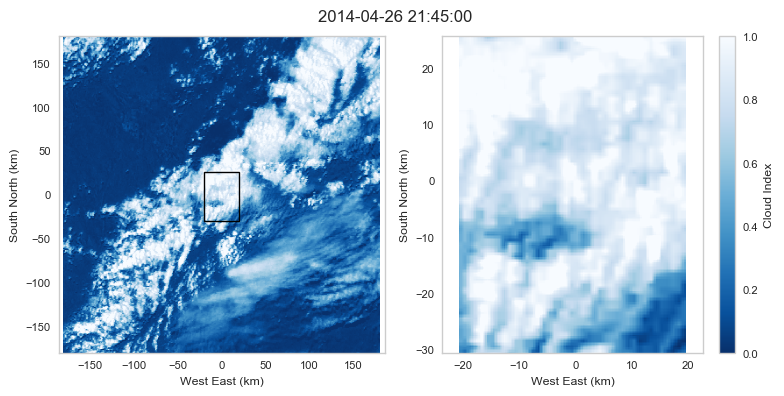

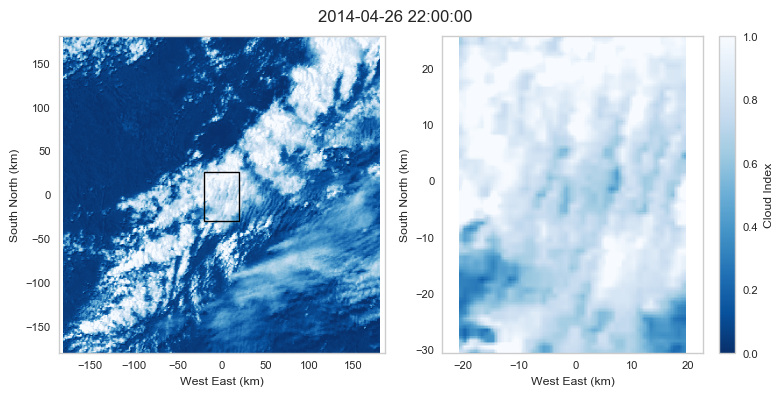

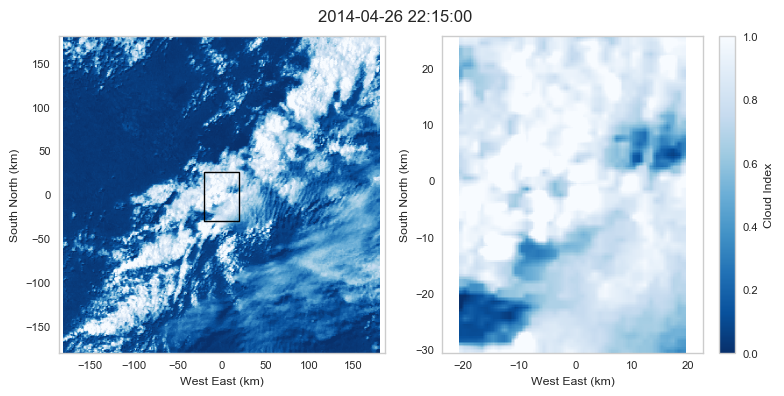

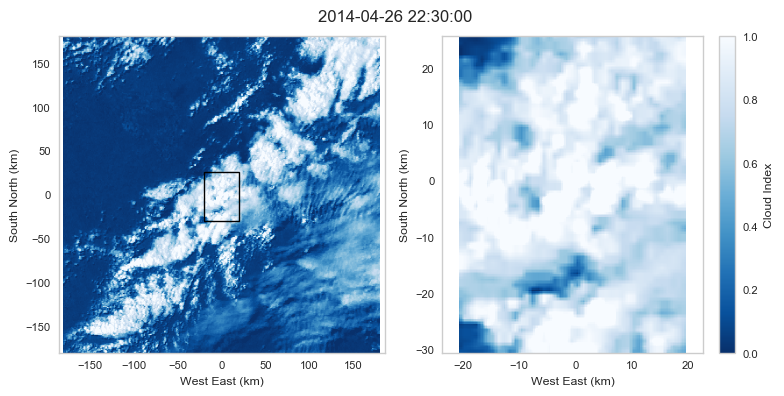

In [70]:
x_ci = CI.west_east.values
y_ci = CI.south_north.values
x_ci = return_edges(x_ci)
y_ci = return_edges(y_ci)
x_center = x_ci.mean()
y_center = y_ci.mean()
x_ci -= x_center
y_ci -= y_center

x_ed = CI_ed.west_east.values
y_ed = CI_ed.south_north.values
x_ed = return_edges(x_ed)
y_ed = return_edges(y_ed)
x_ed -= x_center
y_ed -= y_center
figsize = plt.figaspect(0.5)                                                                                    

x_ed_range = x_ed.max() - x_ed.min()
y_ed_range = y_ed.max() - y_ed.min()

x_ed_min = x_ed.min()
y_ed_min = y_ed.min()

for t in CI.sel(time=slice(start, end)).time:
    this_ci = CI.sel(time=t).values

    
    this_ci_ed = CI_ed.sel(time=t).values

    
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=figsize)
    im = ax[0].pcolormesh(x_ci, y_ci, this_ci, vmin=0, vmax=1, cmap='Blues_r')
    ax[0].axis('equal')
    ax[0].set_ylabel('South North (km)')
    ax[0].set_xlabel('West East (km)')
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[0].add_patch(patches.Rectangle((x_ed_min, y_ed_min),
                                      x_ed_range, y_ed_range,
                                      fc='none', ec='black', lw=1))
    ax[1].pcolormesh(x_ed, y_ed, this_ci_ed, vmin=0, vmax=1, cmap='Blues_r')
    ax[1].set_ylabel('South North (km)')
    ax[1].set_xlabel('West East (km)')
    ax[1].axis('equal')
    t = t.values
    t = pd.Timestamp(t)
    plt.suptitle(t)
    
    plt.colorbar(im, label='Cloud Index')
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[0].set_xlim([x_ci.min(), x_ci.max()])
    ax[1].set_ylim([y_ed.min(), y_ed.max()])
    ax[1].set_xlim([x_ed.min(), x_ed.max()])

In [75]:
year = 2014
month = 5
day = 29

In [76]:
CI = xr.open_dataset(
    f'/a2/uaren/travis/data/{year:04}/{month:02}/{day:02}/data.nc')
CI = CI['ci']
CI = letkf_io.add_crop_attributes(CI)
CI_ed = analyse_results.return_error_domain(CI)

In [87]:
results_CI = xr.open_dataset(
    f'/a2/uaren/travis/results/2014/05/29/wrf_001/20140529_1630Z.nc')
x_cd = results_CI.west_east.values
y_cd = results_CI.south_north.values
x_cd -= x_center
y_cd -= y_center
x_cd_min = x_cd.min()
x_cd_range = x_cd.max() - x_cd_min
y_cd_min = y_cd.min()
y_cd_range = y_cd.max() - y_cd_min

In [77]:
def return_edges(x):
    dx = x[1] - x[0]
    x = x - dx/2
    x = np.append(x, [x[-1] + dx])
    return x

In [78]:
start = pd.datetime(year, month, day, 17, 45)
end = pd.datetime(year, month, day, 17, 50)

In [79]:
%matplotlib inline

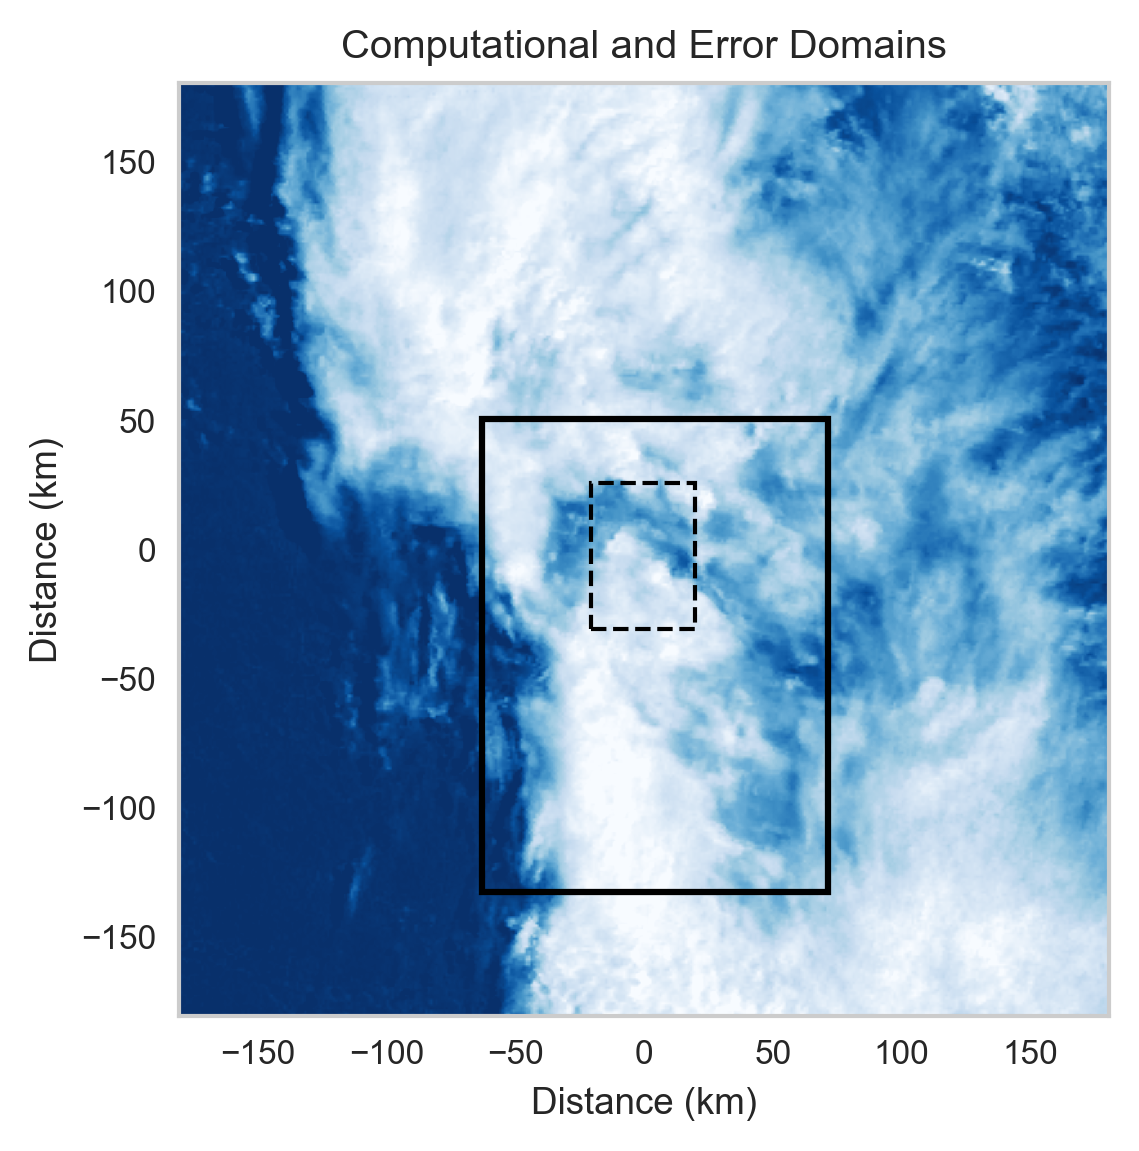

In [101]:
x_ci = CI.west_east.values
y_ci = CI.south_north.values
x_ci = return_edges(x_ci)
y_ci = return_edges(y_ci)
x_center = x_ci.mean()
y_center = y_ci.mean()
x_ci -= x_center
y_ci -= y_center

x_ed = CI_ed.west_east.values
y_ed = CI_ed.south_north.values
x_ed = return_edges(x_ed)
y_ed = return_edges(y_ed)
x_ed -= x_center
y_ed -= y_center                                                                                    

x_ed_range = x_ed.max() - x_ed.min()
y_ed_range = y_ed.max() - y_ed.min()

x_ed_min = x_ed.min()
y_ed_min = y_ed.min()

figsize = plt.figaspect(1.03)

for t in CI.sel(time=slice(start, end)).time:
    this_ci = CI.sel(time=t).values

    
    this_ci_ed = CI_ed.sel(time=t).values

    
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300, figsize=figsize)
    im = ax.pcolormesh(x_ci, y_ci, this_ci, vmin=0, vmax=1, cmap='Blues_r')
    ax.axis('equal')
    ax.set_ylabel('Distance (km)')
    ax.set_xlabel('Distance (km)')
    ax.set_ylim([y_ci.min(), y_ci.max()])
    ax.add_patch(patches.Rectangle((x_ed_min, y_ed_min),
                                      x_ed_range, y_ed_range,
                                      fc='none', ec='black', lw=1, linestyle='--'))
    ax.add_patch(patches.Rectangle((x_cd_min, y_cd_min),
                                      x_cd_range, y_cd_range,
                                      fc='none', ec='black', lw=1.5))
    ax.set_title('Computational and Error Domains')

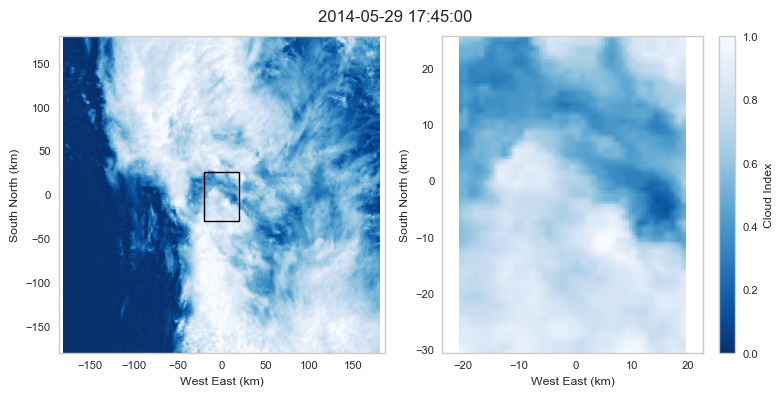

In [80]:
x_ci = CI.west_east.values
y_ci = CI.south_north.values
x_ci = return_edges(x_ci)
y_ci = return_edges(y_ci)
x_center = x_ci.mean()
y_center = y_ci.mean()
x_ci -= x_center
y_ci -= y_center

x_ed = CI_ed.west_east.values
y_ed = CI_ed.south_north.values
x_ed = return_edges(x_ed)
y_ed = return_edges(y_ed)
x_ed -= x_center
y_ed -= y_center
figsize = plt.figaspect(0.5)                                                                                    

x_ed_range = x_ed.max() - x_ed.min()
y_ed_range = y_ed.max() - y_ed.min()

x_ed_min = x_ed.min()
y_ed_min = y_ed.min()

for t in CI.sel(time=slice(start, end)).time:
    this_ci = CI.sel(time=t).values

    
    this_ci_ed = CI_ed.sel(time=t).values

    
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=figsize)
    im = ax[0].pcolormesh(x_ci, y_ci, this_ci, vmin=0, vmax=1, cmap='Blues_r')
    ax[0].axis('equal')
    ax[0].set_ylabel('South North (km)')
    ax[0].set_xlabel('West East (km)')
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[0].add_patch(patches.Rectangle((x_ed_min, y_ed_min),
                                      x_ed_range, y_ed_range,
                                      fc='none', ec='black', lw=1))
    ax[1].pcolormesh(x_ed, y_ed, this_ci_ed, vmin=0, vmax=1, cmap='Blues_r')
    ax[1].set_ylabel('South North (km)')
    ax[1].set_xlabel('West East (km)')
    ax[1].axis('equal')
    t = t.values
    t = pd.Timestamp(t)
    plt.suptitle(t)
    
    plt.colorbar(im, label='Cloud Index')
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[0].set_xlim([x_ci.min(), x_ci.max()])
    ax[1].set_ylim([y_ed.min(), y_ed.max()])
    ax[1].set_xlim([x_ed.min(), x_ed.max()])

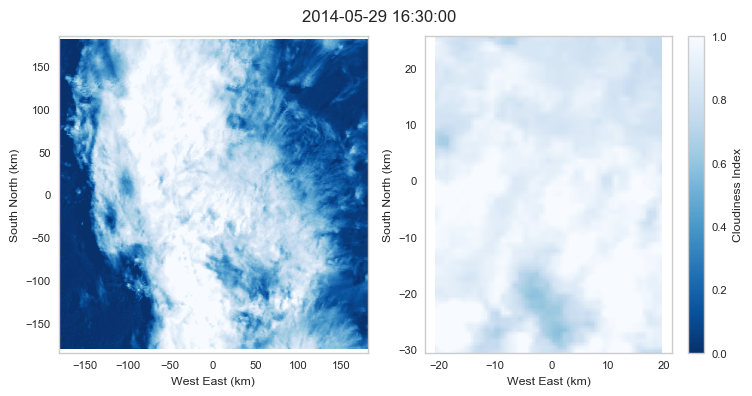

In [31]:
x_ci = CI.west_east.values
y_ci = CI.south_north.values
x_ci = return_edges(x_ci)
y_ci = return_edges(y_ci)
x_center = x_ci.mean()
y_center = y_ci.mean()
x_ci -= x_center
y_ci -= y_center

x_ed = CI_ed.west_east.values
y_ed = CI_ed.south_north.values
x_ed = return_edges(x_ed)
y_ed = return_edges(y_ed)
x_ed -= x_center
y_ed -= y_center
figsize = plt.figaspect(0.521)                                                                                    

for t in CI.sel(time=slice(start, end)).time:
    this_ci = CI.sel(time=t).values

    
    this_ci_ed = CI_ed.sel(time=t).values

    
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=figsize)
    im = ax[0].pcolormesh(x_ci, y_ci, this_ci, vmin=0, vmax=1, cmap='Blues_r')
    ax[0].axis('equal')
    ax[0].set_ylabel('South North (km)')
    ax[0].set_xlabel('West East (km)')
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[1].pcolormesh(x_ed, y_ed, this_ci_ed, vmin=0, vmax=1, cmap='Blues_r')
    ax[1].set_ylabel('South North (km)')
    ax[1].set_xlabel('West East (km)')
    ax[1].axis('equal')
    t = t.values
    t = pd.Timestamp(t)
    plt.suptitle(t)
    
    plt.colorbar(im, label='Cloudiness Index')
    plt.tight_layout(rect=(0, 0, 1, 0.96))
    ax[0].set_ylim([y_ci.min(), y_ci.max()])
    ax[0].set_xlim([x_ci.min(), x_ci.max()])
    ax[1].set_ylim([y_ed.min(), y_ed.max()])
    ax[1].set_xlim([x_ed.min(), x_ed.max()])